In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-25-2021.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4004 non-null   object 
 4   Last_Update          4004 non-null   object 
 5   Lat                  3915 non-null   float64
 6   Long_                3915 non-null   float64
 7   Confirmed            4004 non-null   int64  
 8   Deaths               4004 non-null   int64  
 9   Recovered            727 non-null    float64
 10  Active               726 non-null    float64
 11  Combined_Key         4004 non-null   object 
 12  Incident_Rate        3915 non-null   float64
 13  Case_Fatality_Ratio  3961 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.1+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-26 04:21:28,33.93911,67.709953,143871,6425,82586.0,54496.0,Afghanistan,368.469337,4.431849
1,NaN,NaN,NaN,Albania,2021-07-26 04:21:28,41.15330,20.168300,132875,2456,130139.0,280.0,Albania,4617.242338,1.848354
2,NaN,NaN,NaN,Algeria,2021-07-26 04:21:28,28.03390,1.659600,162155,4063,110577.0,47515.0,Algeria,369.785959,2.505627
3,NaN,NaN,NaN,Andorra,2021-07-26 04:21:28,42.50630,1.521800,14498,127,13988.0,383.0,Andorra,18763.994046,0.875983
4,NaN,NaN,NaN,Angola,2021-07-26 04:21:28,-11.20270,17.873900,41780,984,35474.0,5322.0,Angola,127.121217,2.355194


In [3]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)

In [4]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,143871,54496.0,82586.0,6425
1,Albania,132875,280.0,130139.0,2456
2,Algeria,162155,47515.0,110577.0,4063
3,Andorra,14498,383.0,13988.0,127
4,Angola,41780,5322.0,35474.0,984
5,Antigua and Barbuda,1280,8.0,1229.0,43
6,Argentina,4846615,248910.0,4493984.0,103721
7,Armenia,228798,5149.0,219062.0,4587
8,Australia,33082,8163.0,24001.0,918
9,Austria,656270,4588.0,640951.0,10731


In [5]:
df.to_excel("covid.xlsx")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



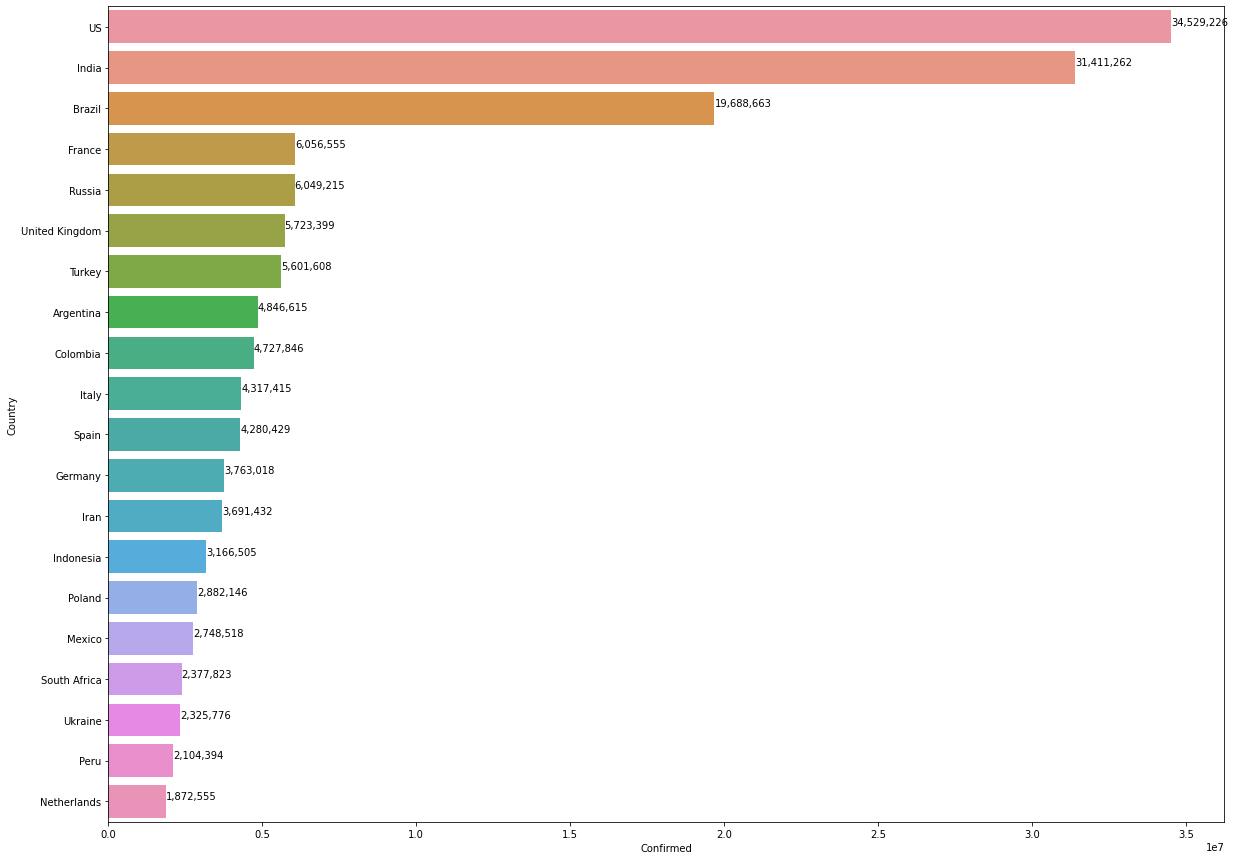

In [6]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Generate a Barplot
plt.figure(figsize=(20,15))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



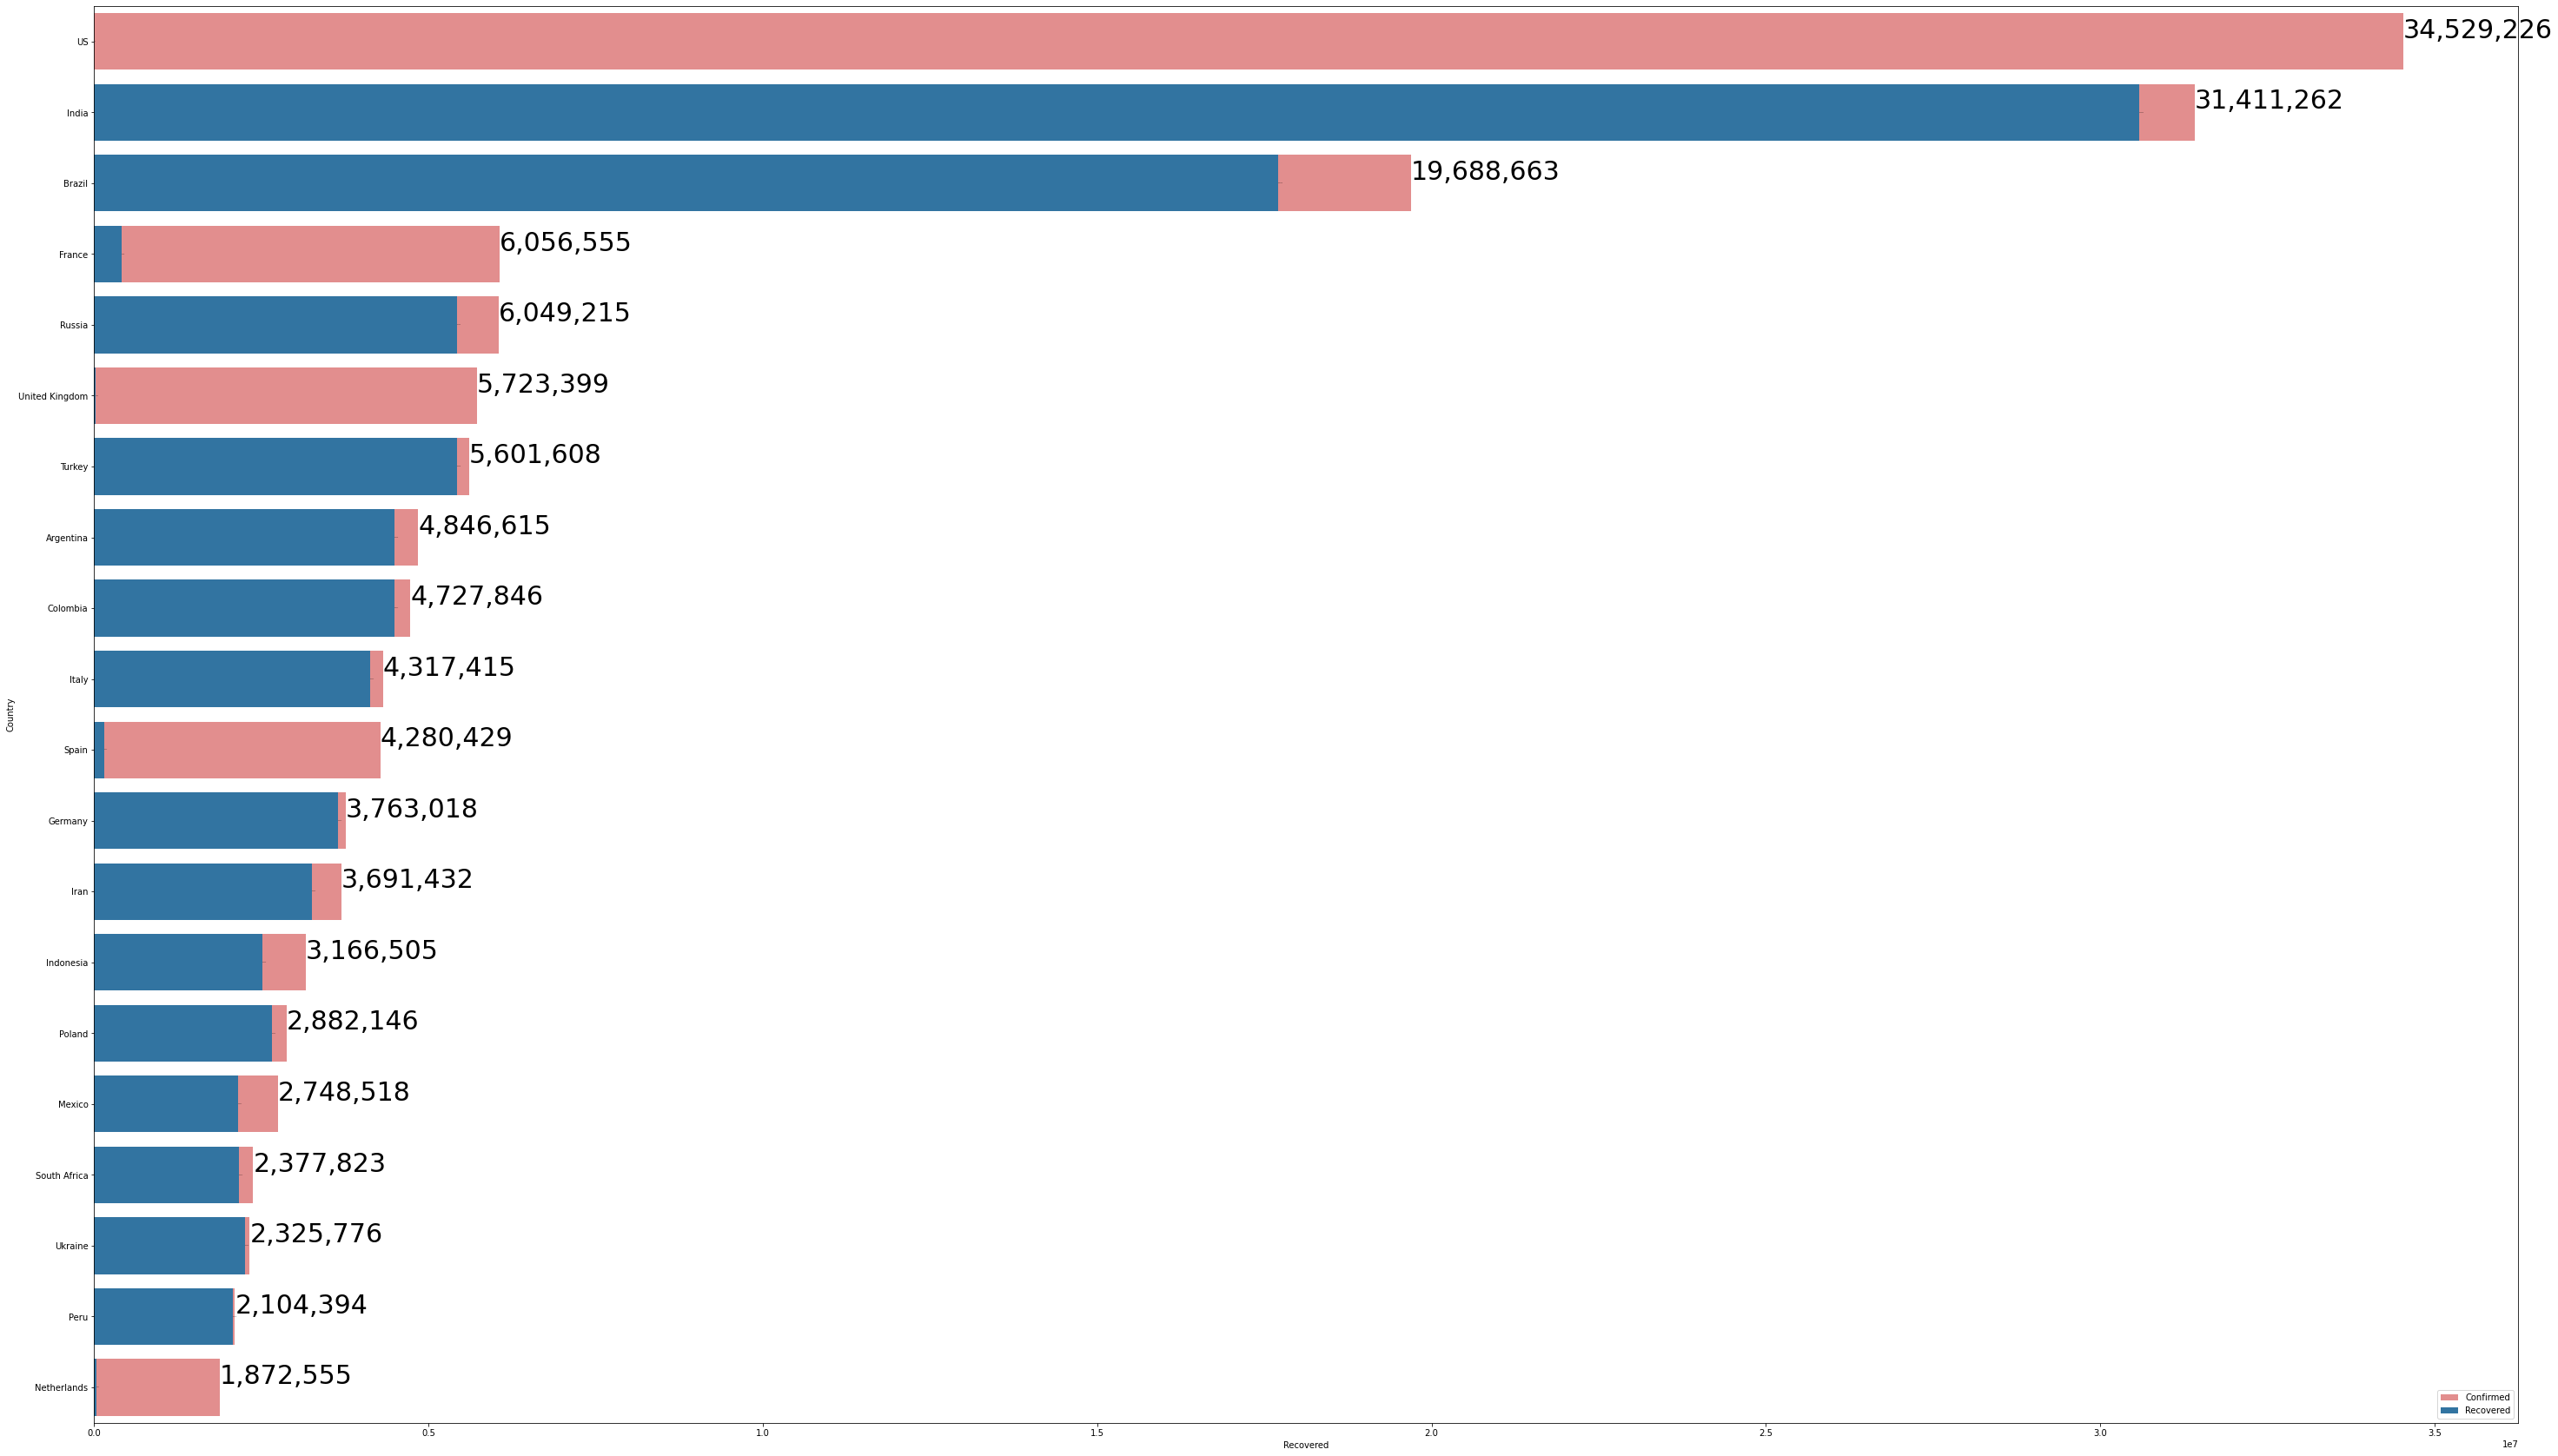

In [7]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(50,30))
confirmed = sns.barplot(top_20['Confirmed'], top_20['Country'], color = 'lightcoral', label='Confirmed')
recovered = sns.barplot(top_20['Recovered'], top_20['Country'], color = 'tab:blue', label='Recovered')

### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=30)
for i,(value,name) in enumerate(zip(top_20['Recovered'],top_20['Country'])):
    recovered.text(value,i-0,f'{value:,.0f}',size=0)
plt.legend(loc=4)
plt.show()

In [8]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()